<a id='top'></a>

# CSCI3022 S22



# Homework 6: Hypothesis Testing

## Due Monday, April 11 at 11:59 pm to Canvas and Gradescope
***

**Name**: ________________________________________________________________________

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


[Back to top](#top)

<a id='p1'></a>

## (10 pts) Problem 1 (Practice): How did we do?
***

A  short prompts on applying Hypothesis Tests to data sets:

### NFL Overtime

On Homework 3 we tested the idea that the first team might be favored in an NFL overtime by estimating the proportions that the first and second teams received the ball.  Suppose we had approached this problem as a hypothesis test, wherein we we would propose a change to a new format if the data suggests a bias towards either team with a signifance of 10%.    Use the large-sample approximation to the Binomial where appropriate.


**1A)** State the null and alternative hypothesis for this experiment, both in "$H_0$" notation as stated as plain English sentences.

**Solution:**

Null: $H_0:p_0=p_1$ or $H_0:p_0-p_1=0$.  The win-rate between the two teams is equal, or games are *fair*  (not that because of ties, we can't propose that each is 50%).


Alternative: $H_A:p_0\ne p_1$ or $H_0:p_0-p_1 \ne 0$.  The win-rate between the two teams is not equal and one team is favored, or games are *unfair*.

**1B)** For *your* results from the "NFL overtime" problem of HW 3 Problem 3, what is the corresponding Z-statistic $Z_{stat}$, p-value, and critical value $z_\alpha$?  What decision would you make?

Note: If you didn't actually do this problem, you may use the solution simulation values of 542 "team 1 wins" and 321 "team 2 wins" in 1000 simulations. But use your own exact values if possible!

In [67]:
alpha=.1
zcrit=stats.norm.ppf(1-alpha/2)
p1=542/1000
p2=321/1000
n=1000

#our sims weren't really independent...
#but a combined proportion by (p1+p2)/2 works whether we consider this "out of 2000" or not
jointp=(542+321)/2000
zstat=(p1-p2)/np.sqrt((jointp)*(1-jointp)/n+(jointp)*(1-jointp)/n)

pval=2*(1-stats.norm.cdf(np.abs(zstat)))

print('Zstat of ', zstat)
print('Compared to critical value of ', zcrit)
print('For a pvalue of ', pval)

Zstat of  9.977497814239893
Compared to critical value of  1.6448536269514722
For a pvalue of  0.0


Unfair for sure!

**1C)** Since the overtime change in 2020, actual NFL game data reveals that the team receiving the ball first has won 86 times and tied 10 times out of 164 total overtime games.  What are the corresponding Z-statistic $Z_{stat}$, p-value, and critical value $z_\alpha$?  What decision would you make with this data?

In [69]:
alpha=.1
zcrit=stats.norm.ppf(1-alpha/2)
p1=86/164
p2=(164-86-10)/164
n=164

#our sims weren't really independent...
#but a combined proportion by (p1+p2)/2 works whether we consider this "out of 2000" or not
jointp=(p1+p2)/2
zstat=(p1-p2)/np.sqrt((jointp)*(1-jointp)/n+(jointp)*(1-jointp)/n)

pval=2*(1-stats.norm.cdf(np.abs(zstat)))

print('Zstat of ', zstat)
print('Compared to critical value of ', zcrit)
print('For a pvalue of ', pval)

Zstat of  1.9914730903061049
Compared to critical value of  1.6448536269514722
For a pvalue of  0.04642890077911255


Still looks unfair, with our tolerance of Type 1 error rate of .10!

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2- The power!

Dale and Brennan were gifted a Playstation, and have replaced playing sports and card games with endless games of FIFA against one another.  Dale is happy to just play and have fun, but Brennan is very interested in demonstrating his superiority over his brother, and wants to *prove* that he's actually better at the game.

Suppose they play 100 games and record the results.  Let $B$ be the number of wins for Brennan in 100 games of FIFA, where we perhaps denote the *true* probability of Brennan winning any given game by $p$. 

Similar to the Belgian Euro example, we hope to *test* whether this set of games is biased **towards Brennan**.

#### Part a)

State the null and alternative hypotheses.


**Solution:**

$H_0: p=0.5;$ or the game is fair.

$H_a: p > 0.5;$ or the probability of Brennan winning exceeds .5.


#### Part b)
Suppose we define the rejection region to be $B > 59$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)


In [2]:
print('P(Type 1 Error)',1-stats.binom.cdf(59, p=0.5, n=100))

P(Type 1 Error) 0.02844396682049044



#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).


In [61]:
one_sim=stats.binom.rvs(p=0.5, n=100)
if one_sim>59:
    print(one_sim, ' was big enough, we REJECTED!')
else:
    print(one_sim, ' was not big enough, we DID NOT REJECT!')

many_sims=stats.binom.rvs(p=0.5, n=100, size=1000)
print('We rejected ',np.sum(many_sims > 59)/1000 , 'Proportion of the time')

44  was not big enough, we DID NOT REJECT!
We rejected  0.04 Proportion of the time



#### Part d)
Consider that the *reality* of Brenann being favored to win could take on any possible different value of actual bias $p>.5$, and how well we make our decisions depends on *how* favored Brennan actually is!  Construct a grid/list of some possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the **power** of the test from part $a$.  Return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true, so it's the probability of corrected *detecting* that Brennan is the better player). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

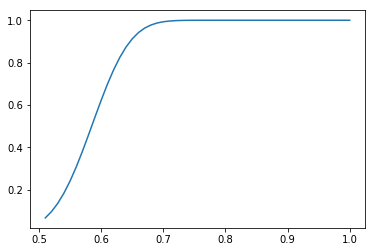

In [4]:
ps=np.linspace(.51,1,50)
powers=np.zeros(len(ps))
for i in range(len(ps)):
    powers[i]=1-stats.binom.cdf(58, n=100, p=ps[i])
plt.plot(ps, powers)

**Solution**: As the true probability increases, power increases.  This makes sense, since it's easier and easier to *detect* that the coin is unfair the more unfair that it is!

#### Part e)

(e) Suppose we allowed other rejection regions than $B>59$.  Use the ideas in part (d) to answer the following: how many plays $m$ of a game are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a).  You may focus on the "hardest to detect" value of $p_{alt}$ from the list in part d.

In other words: suppose that **either** Brennan is perfectly matches with Dale **or** that Brennan wins exactly 51% of the time.  How many games do they have to play to be able to correctly diagnose both cases 95% of the time?

*Hint*: You can brute force this to find the first value of $n$ that satisfies the requirement.  Intuition: to be able to tell a 50% "coin" and a 51% coin apart might take quite a few flips...

**Solution**: Using the values for $p$ in part d), we're going to figure out what the sample size would have to be to get both errors probabalities under 0.05.  The idea: *given* a sample size, find the value $c$ so that $P(\#Heads>c;)<0.05$ for a fair coin, then check if $P(\#Heads \leq c;)<0.05$ for an unfair coin.  We can safely use only $p=0.51$ for the unfair coin, since we know from part d) that any cutoff that works for a 51\% unfair coin should work for a even more biased coin.

Below is a brute force method, checking every $n$ starting at 100 until we find the first that works.  You can construct a slightly more elegant algebraic solution by trying to actually solve for the $n$ in the pmf of a binomial!

In [5]:
Done= False
n=100
while not Done:
    cutoff=stats.binom.ppf(.95, p=.5, n=n)
    power=1-stats.binom.cdf(cutoff, p=.51, n=n)
    if power>.95:
        print(n, 'was enough! If we see ', cutoff, 'or more heads, we REJECT!')
        print('Which is', 100*cutoff/n, '% heads')
        print('and', 1- stats.binom.cdf(cutoff, p=.50, n=n), 'Prob Type 1 error,')
        print('and', stats.binom.cdf(cutoff, p=.51, n=n), 'Prob Type 2 error,')
        Done= True
    else:
        n+=1
    if n % 5000 == 0:
        print(n, cutoff, power)
    if n==50000:
        print(n, 'was not enough!')
        Done= True
        

5000 2558.0 0.39942890303484435
10000 5082.0 0.6330496900500331
15000 7600.0 0.7882048694577309
20000 10116.0 0.8797832626143077
25000 12630.0 0.9338896039357922
27084 was enough! If we see  13677.0 or more heads, we REJECT!
Which is 50.49844926894107 % heads
and 0.049809593114952144 Prob Type 1 error,
and 0.04998304219450622 Prob Type 2 error,



## Problem 3 (Hypothesis Simulation; 17 points)
***
Suppose our goal is to outperform a very naive self-driving vehicle. This vehicle is so simple that its motion is entirely random!  The goal is for both our self-driving "car" and the comparison "random" car is to make it from the starting location in the bottom left in Cartesian coordiantes (0,0) and make it to the end goal at (5,2).

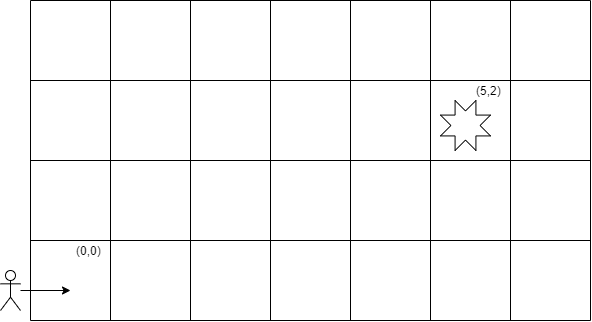

Movement for the "random" car occurs under the following rules:
- Each time step, the car will attempt to choose a cardinal direction to move out of (N, S, W, E)
- It will choose to move the **same** direction as its prior motion exactly 50% of the time
- It will choose to turn left or right exactly 25% of the time, each.  (So if it was going North, it could stay North or turn to East or West.)
- If a movement chosen would result in it leaving the 7x4 region shown, it will choose again from the same options and probabilities until a valid movement is chosen.

The car is done moving as soon as it enters the square at (5,2).  It starts at (0,0), and moves as though its prior move was to the East.

**Part A**: Needless to say, this car isn't very smart.  Simulate 10,000 "journies" of this randomly moving car, saving both how many movements were required to reach (5,2). You may use any syntax/API you want, but one option is loosely outlines below.

In [6]:
#mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=E.  Makes for a nice way to estimate probs.
cartesian_directions=np.array([(0,1), (1,0), (0,-1), (-1,0)])

def move(location, previous_direction):
    valid=False
    while not valid:
        newchoice=np.random.choice([0,1,-1], p=[.5,.25,.25])
        new_direction=(4+previous_direction+newchoice)%4 
        new_location=np.array(location+cartesian_directions[new_direction])
        if (new_location[0]>-1) & (new_location[0]<7) & (new_location[1]<4)& (new_location[1]>-1):
            valid=True            
    return new_direction, new_location

def journey(initial_location, initial_direction, goal_location):
    movements=0
    location=initial_location
    direction=initial_direction
    done=False
    while not done:
        direction, location=move(location, direction)
        movements+=1
#         print(direction, location)
        if np.max(np.abs(np.array(location)-np.array(goal_location)))==0:
            done=True
    return movements


In [7]:
results=np.array([journey((0,0), 1, [5, 2]) for _ in range(10**4)])

**Part B**: Create a density histogram of the number of movements.  Label axes, and include a title.  Does this appear to be normally distributed? Why would we care?
    

In [8]:
np.mean(results)
pd.Series(results).describe()

count    10000.000000
mean        30.753000
std         25.243596
min          7.000000
25%         13.000000
50%         23.000000
75%         41.000000
max        319.000000
dtype: float64

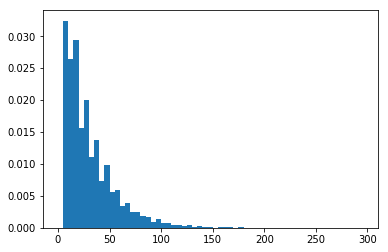

In [9]:
bins=range(0,300,5)
plt.hist(results, bins=bins, density=True);

It doesn't look very normal: it has a clear right skew.  As a result, we probably can't use the central limit theorem to describe averages until we have **lots** of trips (like $n \geq 30$).

**Part C**: You and your team design a new car, and thankfully it uses a **different** algorithm to determine how and where to move.  Unfortunately, you don't get a sample size of 10,000 samples from your car, since it actually drives on a small track.  You drive it on a similar grid to the above 10 times, and find that over those 10 times your car averaged 16 moves, and had a median of 17 moves.  Is this demonstrably better than the car you simulated in parts **A** and **B**?  Answer with the following prompts:

**C1**: What is your estimated probability that a single trip of the "random" car takes 16 moves or less?

**C2**: What would you estimate the probability to be that an *average* number of movements over 10 trips is 16 or less?
     
**C3**: Suppose we were to create a 1-tailed hypothesis test of the form "I reject the null hypothesis that my car of the same quality as the random car if a set of 10 trials has an average number of movements less than or equal to $c$."  What would you choose for $c$ if you wanted a probability of Type I error of .04 or less?

**C4**: Would your results in parts **C1**-**C3** change it all if we compared the *medians* instead of the *means* of your car versus the "random" car?

**C5**: What can you safely (with statistical rigor!) tell people about your new car?

*Hint*: `np.reshape` is a nice way to group your original simulations into sets-of-10, if that interests you

C1: Estimated P(random <=16)= 0.3476
C2: Estimated P(10-set mean <=16)= 0.017
C3: 1% min cutoff of means for sets of 10 19.192
C2: Estimated P(10-set median <=17)= 0.202
C3: 1% min cutoff for medians of sets of 10 13.0


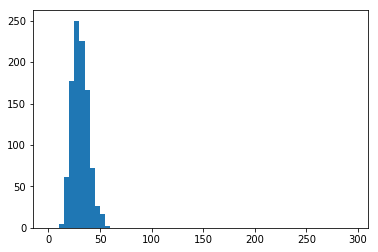

In [10]:
print('C1: Estimated P(random <=16)=', np.sum(results<17)/len(results))

setsof10=np.reshape(results, (-1,10))
meansof10=np.mean(setsof10,1)
bins=range(0,300,5)
plt.hist(meansof10, bins=bins)

print('C2: Estimated P(10-set mean <=16)=', np.sum(meansof10<17)/len(meansof10))
print('C3: 1% min cutoff of means for sets of 10', np.percentile(meansof10,4))

#for medians:
mediansof10=np.median(setsof10,1)
print('C2: Estimated P(10-set median <=17)=', np.sum(mediansof10<18)/len(mediansof10))
print('C3: 1% min cutoff for medians of sets of 10', np.percentile(mediansof10,4))


**C5: Solutions**:  

Our car definitely seems to do better than the random car in terms of the means, since in my data only 1% of random car sets of 10 runs had a mean of 19 or less, and only 2% had a mean of 16 or less.

The medians is less clear, though.  Our median of 17 happened in 20% of runs with the random car, and the "1% cutoff" we might use for decision making was all the way down at a median of 13.  If we were making a Hypothesis test, we'd conclude that our car is definitely better *on average*, but may not do much better on a typical run.  How does this make sense?  Our car is probably much better at not getting stuck in corners for 100s of moves.